<h1><center>Metody numeryczne i optymalizacja</center></h1>

<h3><center>Lista 4</center></h3>
<h3><center>LINIOWE ZADANIA PODOKREŚLONE</center></h3>



<h6><center>Antoni Bezdzietny 249327</center></h6>

<h6><center>Paweł Krysa 249171</center></h6>

<h6><center>24.04.2022</center></h6>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Problem rozwiązania rzadkiego 
---
Minimalizacja w zadaniach podokreślonych:
$$ min_x \{ ||\boldsymbol{Ax-b}||^2_2 + \gamma E^{(p)}(\boldsymbol{x})  \} $$

Miara różnorodności Lp:
$$ E^{(p)}(\boldsymbol{x}) = sgn(p) \sum^N_{j=1} |x_j|^p \quad p \leq 1$$

---
##### Algorytm FOCUSS
$p\in [0,1], \lambda > 0 $

$\boldsymbol{x}^{(0)}$ - zainicjalizowany wartościami przypadkowymi 

**FOR** k = 0,1,2,... do uzyskania zbieżności **wykonaj**

$\boldsymbol{W}_k = diag\{|x_j^{(k)}|^{\frac{1-p}{2}}\}$

$\boldsymbol{x}^{(k+1)} = \boldsymbol{W}_k^2\boldsymbol{A}^T(\boldsymbol{A}\boldsymbol{W}_k^2\boldsymbol{A}^T + \lambda \boldsymbol{I}_M)^{-1}\boldsymbol{b}$

---
#### Algorytm MFOCUSS
$p\in [0,1], \lambda > 0 $

$\boldsymbol{X}^{(0)}$ - zainicjalizowany wartościami przypadkowymi 

**FOR** k = 0,1,2,... do uzyskania zbieżności **wykonaj**

$\boldsymbol{W} = diag(w^{\frac{1-p}{2}}_j)$ gdzie: $w_j = ||(\boldsymbol{x}^T_j)^{(k-1)}||_2$

$ A^{(k+1)} = \boldsymbol{AW}^{(k)}$

$ \boldsymbol{X}^{(k+1)} = \boldsymbol{W}^{(k)}(\boldsymbol{A}^{(k)})^T(\boldsymbol{A}^{(k)}(\boldsymbol{A}^{(k)})^T + \lambda \boldsymbol{I}_M)^{-1}\boldsymbol{B}$

In [2]:
# Implementacja zgodna z podanym algorytmem 
def FOCUSS(A,b,p=0.5, k=20, lmb = 1e-4):
    """Iplementacja algorytmu FOCUSS dla k przebiegów"""
    x = np.random.rand(A.shape[1]).reshape(A.shape[1],1)
    for _ in range(k):
        W = np.power(np.diag(np.power(np.abs(x[:,0]), (1-p)/2)), 2)
        x = W@A.T@np.linalg.inv(A@W@A.T+lmb*np.eye(A.shape[0]))@b
    return x  

# Implementacja z progiem błędu
def FOCUSS_THRESHOLD(A,b,p=1, lmb=1e-4, eps=1e-4):
    """Iplementacja algorytmu FOCUSS z zadanym progiem błędu eps"""
    x = np.random.rand(A.shape[1]).reshape(A.shape[1],1)
    x_b = x
    error = 1
    iter_count = 0 
    while error > eps:
        W = np.power(np.diag(np.power(np.abs(x[:,0]), (1-p)/2)), 2)
        x = W@A.T@np.linalg.inv(A@W@A.T+lmb*np.eye(A.shape[0]))@b
        error = np.sum(np.abs(x-x_b))
        x_b = np.copy(x)
        iter_count+=1
    return x, iter_count

In [3]:
def MFOCUSS(A,B, p=0.5, k=20, lmb=1e-4):
    """Implementacja algorytmu MFOCUSS dla k przebiegów"""
    X = np.random.rand(A.shape[1], B.shape[1])
    for _ in range(k):
        W = np.diag(np.power(np.linalg.norm(X, axis=1), (1-p)/2))
        Ak1 = A@W
        X = W@Ak1.T@np.linalg.inv(Ak1@Ak1.T + lmb*np.eye(A.shape[0]))@B
    return X

---
### Zadanie 1
Znajdź liczby a, b, c, dla których poniższy układ równań nie jest sprzeczny. Przyspełnieniu warunku niesprzeczności, znajdź zbiór wszystkich rozwiązań (w funkcji parametrów a, b oraz c):

$$ 
\left\{\begin{matrix}
 x & +3y & +z & = a\\ 
-x & +2y & +z & =b\\ 
 3x & +7y & -z & =c
\end{matrix}\right.
$$

Następnie, wyznacz parametry a, b, c, dla których:
$$(a) x = 0, y = 3, z = 1$$
$$(b) x = 0, y = 0, z = 1$$
$$(c) x = -2, y= 1, z = 0$$
Dla wyznaczonych parametrów a, b, c, znajdź estymowane rozwiązanie przy pomocy zregularyzowanego algorytmu FOCUSS.

---

Układ równań do rozwiązania:
$$\begin{bmatrix}1 &3  &1 \\ -1 &-2  &1 \\ 3 &7  &-1 \end{bmatrix}\begin{bmatrix}x\\ y\\ z\end{bmatrix}=\begin{bmatrix}a\\ b\\ c\end{bmatrix}$$



Korzystając z eliminacji Gaussa uzyskano:
$$
    \begin{bmatrix}
    1 & 3 & 1 & | & a\\ 
    -1 & -2 &  1& | & b\\ 
     3&  7&  -1& | & c
    \end{bmatrix}
    \rightarrow 
    \begin{bmatrix}
    1 & 3 & 1 & | & a\\ 
    0 & 1 &  2& | & b+a\\ 
    0 & -2 &  -4& | & c-3a
    \end{bmatrix}
    \rightarrow 
    \begin{bmatrix}
    1 & 0 & -5 & | & -2a-3b\\ 
    0 & 1 &  2& | & b+a\\ 
    0 & 0 &  0& | & c-a+2b
    \end{bmatrix}
$$

W wyniku uzyskano:
$$
\left\{\begin{matrix}
 x &=& -2a & -3b & +5z\\ 
 y &=& b & +a & -2z\\ 
 z &=& wolna &zmienna &
\end{matrix}\right.
$$

Warunek posiadania rozwiązania: $c-a+2b = 0$

---
Dla wariantu (a) x = 0, y = 3, z = 1
$$
\left\{\begin{matrix}
 a & = & 10\\ 
 b & = & -5\\ 
 c & = & 20
\end{matrix}\right.
$$


$$20-10+2(-5)=0$$ 


Dla wariantu (b) x = 0, y = 3, z = 1
$$
\left\{\begin{matrix}
 a & = & 1\\ 
 b & = & 1\\ 
 c & = & -1
\end{matrix}\right.
$$


$$-1-1+2(1)=0$$ 


Dla wariantu (c) x = -2, y = 1, z = 0
$$
\left\{\begin{matrix}
 a & = & 1\\ 
 b & = & 0\\ 
 c & = & 1
\end{matrix}\right.
$$


$$1-1+2(0)=0$$ 

Wszystkie podpunkty posiadają rozwiązanie.

In [4]:
A = np.array([[1,3,1],
              [-1,2,1],
              [3,7,-1]])
# Dla przypadku a 
x = np.array([0,3,1]).reshape(3,1)
b = A@x
x_ls, iter_ = FOCUSS_THRESHOLD(A,b)
print(f'Wyniki uzyskane dla przypadku (a) w {iter_} iteracjach: \n {x_ls}')
print(f'Błąd rozwiązania: {np.linalg.norm(x-x_ls)}')
print(f'Błąd residualny: {np.linalg.norm(b-A@x_ls)}')

# Dla przypadku b
x = np.array([0,0,1]).reshape(3,1)
b = A@x
x_ls, iter_ = FOCUSS_THRESHOLD(A,b)
print(f'Wyniki uzyskane dla przypadku (b) w {iter_} iteracjach: \n {x_ls}')
print(f'Błąd rozwiązania: {np.linalg.norm(x-x_ls)}')
print(f'Błąd residualny: {np.linalg.norm(b-A@x_ls)} \n')

# Dla przypadku c
x = np.array([-2,1,0]).reshape(3,1)
b = A@x
x_ls, iter_ = FOCUSS_THRESHOLD(A,b)
print(f'Wyniki uzyskane dla przypadku (c) w {iter_} iteracjach: \n {x_ls}')
print(f'Błąd rozwiązania: {np.linalg.norm(x-x_ls)}')
print(f'Błąd residualny: {np.linalg.norm(b-A@x_ls)} \n')

Wyniki uzyskane dla przypadku (a) w 2 iteracjach: 
 [[1.48438683e-05]
 [2.99998906e+00]
 [9.99974220e-01]]
Błąd rozwiązania: 3.169528925655024e-05
Błąd residualny: 7.654524203204636e-05
Wyniki uzyskane dla przypadku (b) w 2 iteracjach: 
 [[-5.54601147e-05]
 [ 1.71847099e-05]
 [ 9.99922666e-01]]
Błąd rozwiązania: 9.670443391046606e-05
Błąd residualny: 8.793466054708215e-05 

Wyniki uzyskane dla przypadku (c) w 2 iteracjach: 
 [[-1.99983440e+00]
 [ 9.99943757e-01]
 [ 1.28104939e-04]]
Błąd rozwiązania: 0.0002167928618693566
Błąd residualny: 0.00019682631821551063 



#### Wnioski 
Dla wszystkich przypadków równania posiadały rozwiązanie tzn. wyzerowany wiersz musi być równy wartości zero w kolumnie dopełnienia. W przypadku (a) oraz (b) błąd rozwiązania jak i błąd residualny są rzędu $10^{-5}$, w przypadku (c) błędy są większe.

---
### Zadanie 2
Wykonaj projekcję dokładnego rozwiązania $\boldsymbol{x}=[1, 0, 1, 1, 0]^T$ na podprzestrzeń kolumnową macierzy:

$$
\boldsymbol{A}=
\begin{bmatrix}
1 &  2&  2&  3& 1\\ 
2 &  4&  4&  6& 2\\ 
3 &  6&  6&  9& 6\\ 
1 &  2&  4&  5& 3
\end{bmatrix}
$$

Znajdź rozwiązanie przybliżone dla układu równań $\boldsymbol{AX =b}$ dla danej macierzy $\boldsymbol{A}$ i wektora $\boldsymbol{b}$. Zmień wartość elementu $a_{21}$ z 2 na 0, a następnie powtórz krok estymacji. Wyjaśnij różnicę. Wyznacz błędy rozwiązania i residualny. Który algorytm pozwala uzyskać najlepsze rozwiązanie i dlaczego? Dla jakiej metryki funkcji celu uzyskuje się najlepsze rozwiązanie?

In [5]:
A = np.array([[1,2,2,3,1],
              [2,4,4,6,2],
              [3,6,6,9,6],
              [1,2,4,5,3]])
x = np.array([1,0,1,1,0]).reshape(5,1)
b = A@x

# Wyniki dla a21 = 2
x_ls, iter_ = FOCUSS_THRESHOLD(A,b)
print(f'Uzyskane wyniki w {iter_} iteracjach, dla a21 = 2 :')
print(x_ls.round(3))
print(f'Błąd rozwiązania: {np.linalg.norm(x_ls-x)}')
print(f'Błąd residualny: {np.linalg.norm(b-A@x_ls)}')
print(f'Wskaźnik uwarunkowania macierzy: {np.linalg.cond(A)}')
print()

# Wyniki dla a21 = 0
A[1,0]=0
b = A@x
x_ls, iter_ = FOCUSS_THRESHOLD(A,b)
print(f'Uzyskane wyniki w {iter_} iteracjach, dla a21 = 0 :')
print(x_ls.round(3))
print(f'Błąd rozwiązania: {np.linalg.norm(x_ls-x)}')
print(f'Błąd residualny: {np.linalg.norm(b-A@x_ls)}')
print(f'Wskaźnik uwarunkowania macierzy: {np.linalg.cond(A)}')

Uzyskane wyniki w 2 iteracjach, dla a21 = 2 :
[[0.182]
 [0.364]
 [0.909]
 [1.091]
 [0.   ]]
Błąd rozwiązania: 0.9045340343267222
Błąd residualny: 4.627303774171212e-05
Wskaźnik uwarunkowania macierzy: 2.0770692115952788e+16

Uzyskane wyniki w 2 iteracjach, dla a21 = 0 :
[[1.]
 [0.]
 [1.]
 [1.]
 [0.]]
Błąd rozwiązania: 0.0002591954789408494
Błąd residualny: 0.00016910846532587783
Wskaźnik uwarunkowania macierzy: 28.47897675383624


### Wnioski
Jak można zauważyć w uzyskanych powyżej wynikach. W przypadku gdy $a_{21}=2$, rozwiązanie znacznie różni się od rozwiązania dokładnego oraz błąd rozwiązania jest duży, przy niskim błędzie residualnym. W przypadku gdy $a_{21}=0$ oba błedy są rzędu $10^{-3}$, a rozwiązanie jest bardzo bliskie rozwiązaniu dokładnego. Wynika to z faktu, iż dla wartości $a_{21}=0$ macierz jest źle uwarunkowania (duża wartość wskaźnika uwarunkowania macierzy).

--- 
### Zadanie 3 
Wygeneruj 5 rzadkich sygnałów z dyskretnym czasem, tak aby dla każdego chwili co najwyżej 3 sygnały były niezerowe. Liczba próbek powinna być dobrana rozsądnie, ale nie mniej niż 10. Wykonaj projekcję takich sygnałów na podprzestrzeń kolumnową macierzy $\boldsymbol{A}$, uzyskując sygnały zmieszane.

$$
\boldsymbol{A}=
\begin{bmatrix}
1 &  2&  2&  3& 1\\ 
0 &  4&  4&  6& 2\\ 
3 &  6&  6&  9& 6\\ 
1 &  2&  4&  5& 3
\end{bmatrix}
$$
Następnie dokonaj estymacji sygnałów oryginalnych na podstawie sygnałów zmieszanych wykorzystując algorytmy: zregularyzowany FOCUSS i zregularyzowany M-FOCUSS. Który algorytm pozwala uzyskać lepsze wyniki estymacji i dlaczego? Jak dobrać optymalną wartość
parametru regularyzacji?

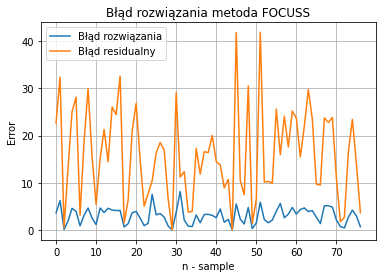

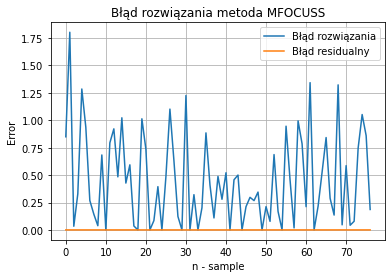

In [6]:
N = 100
A = np.array([[1,2,2,3,1],
              [0,4,4,6,2],
              [3,6,6,9,6],
              [1,2,4,5,3]])

# Wygenerowanie macierzy Nx5 o rozkładzie normalnym z wyzerowanymi wartościami < 0
X = np.maximum(0, np.random.randn(N,5)) 
X = X[np.sum(np.where(X>0,1,0), axis=1)<4] # Usunięcie wierszy gdzie liczba niezerowych syganłów > 3
n_sample = X.shape[0] # Ilość próbek

B = X@A.T # Projekcja na przestrzeń kolumnową A

# Wykorzystanie metody FOCUSS
x_focus = np.zeros((5,n_sample))
x_focus_err_solve = list()
x_focus_err_res = list()
for i in range(n_sample):
    x_focus[:,[i]] = FOCUSS(A,B[[i]].T)[0]
    x_focus_err_solve.append(np.linalg.norm(x_focus[:,[i]]-X[[i],:]))
    x_focus_err_res.append(np.linalg.norm(B[[i]]-A@X[[i],:].T))
       
plt.plot(range(n_sample),x_focus_err_solve, label='Błąd rozwiązania')
plt.plot(range(n_sample),x_focus_err_res, label='Błąd residualny')
plt.legend()
plt.grid()
plt.xlabel('n - sample')
plt.ylabel('Error')
plt.title('Błąd rozwiązania metoda FOCUSS')
plt.show()

# Rozwiązanie z wykorzystaniem MFOCUSS
x_mfocuss = MFOCUSS(A,B.T)        
x_mfocuss_err_solv = np.linalg.norm(x_mfocuss-X.T,axis=0)
X_mfocuss_err_res  = np.linalg.norm(B.T-A@x_mfocuss, axis=0)

plt.plot(range(n_sample), x_mfocuss_err_solv, label='Błąd rozwiązania')
plt.plot(range(n_sample), X_mfocuss_err_res, label='Błąd residualny')
plt.legend()
plt.grid()
plt.xlabel('n - sample')
plt.ylabel('Error')
plt.title('Błąd rozwiązania metoda MFOCUSS')
plt.show()


### Wnioski
Korzystając z zaimplementowanych metod FOCUSS oraz MFOCUSS wyznaczono rozwiązania równań. Korzystając z uzyskanych wyników, wyznaczono błąd residualny oraz błąd rozwiązania. Oba błędy przedstawiono na wykresach powyżej. Jak można zaobserwować, błędy przy wykorzystaniu MFOCUSS są znacznie mniejsze. W przypadku metody MFOCUSS aktualizacja odbywa się z wykorzystaniem wszystkich próbek naraz.

---
### Zadanie 4
Rozwiąż zadanie podokreślone:
$$min_x ||\boldsymbol{x}||_p \; p.o. \; \boldsymbol{Ax=b},$$

$$
\boldsymbol{A} = 
\begin{bmatrix}
2 &3  &-1  &10  &21  &44  &-9  &1  &-1 \\ 
1 &2  &2  &8  &15  &35  &8  &-3  &1 \\ 
3 &1  &1  &6  &16  &53  &-7  &2  &2 
\end{bmatrix} 
$$

$$
\boldsymbol{b} =
\begin{bmatrix}
118 &77  &129 
\end{bmatrix}^T
$$
$$
p \in [0,1]
$$
Porównaj wyniki dla p = 0 oraz p = 1 pod względem błędu residualnego.

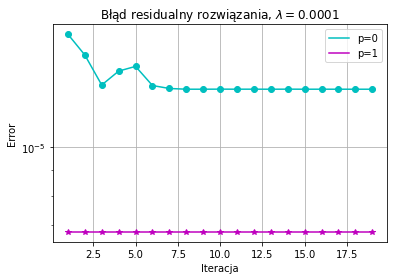

Dla p=0 błąd residualny 1.2992067085162734e-05, w 17 iteracjach. 
Dla p=1 błąd residualny 6.794273442758616e-06, w 2 iteracjach. 


In [7]:
A = np.array([[2,3,-1,10,21,44,-9,1,-1],
              [1,2,2,8,15,35,8,-3,1],
              [3,1,1,6,16,53,-7,2,2]])
b = np.array([[118],
             [77],
             [129]])

iterations = range(1,20) # Zakres iteracji
x_ls_p0 = [FOCUSS(A,b,p=0, k=i, lmb=1e-4) for i in iterations] # Dla p=0
x_ls_p1 = [FOCUSS(A,b,p=1, k=i, lmb=1e-4) for i in iterations] # Dla p=1

err_res_p0 = [np.linalg.norm(b-A@x) for x in x_ls_p0] # Błąd dla p=0
err_res_p1 = [np.linalg.norm(b-A@x) for x in x_ls_p1] # Błąd dla p=1

# Wykres błędu residualnego
plt.semilogy(iterations, err_res_p0, color='c', label='p=0')
plt.semilogy(iterations, err_res_p0, 'o', color='c')
plt.semilogy(iterations, err_res_p1, color='m', label='p=1')
plt.semilogy(iterations, err_res_p1, '*', color='m')
plt.title("Błąd residualny rozwiązania, "+r'$\lambda =0.0001$')
plt.xlabel("Iteracja")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

# Implementacja z wartością graniczną błędu
variants = [0, 1] # Warianty p
x_ls = [FOCUSS_THRESHOLD(A, b, p=v) for v in variants]
err_res = [np.linalg.norm(b-A@x[0]) for x in x_ls]
for i in range(len(err_res)):
    print(f'Dla p={i} błąd residualny {err_res[i]}, w {x_ls[i][1]} iteracjach. ')

### Wnioski
Porównano wyniki błędu residualnego dla algorytmy FOCUSS dla współczynnika p=0 oraz p=1. Dla wartości p=0 błąd residualny bliski poziomowi poziomu $10^{-6}$ osiągany jest w zdecydowanie większej ilości iteracji. Na wykresie przedstawiono bład residualny dla obu wartości, w dziedzinie ilości iteracji. 